# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [119]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#supress the warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [120]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIT-Assesments/Foundations/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [122]:
# Write your code here
df.shape

(1898, 9)

#### Observations: The DataFrame has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [123]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:


*   There are three different data types - int64, float64 and object
*   There are 4 numerical columns - order_id, customer_id, cost_of_the_order, food_preparation_time, delivery_time
* From the numerical columns, cost_of_the_order is of decimal value while the others are of integer value
* The rest of the columns are categorical.
* The customer_id column can be treated as a categorical column instead of int64 because it is of no numerical value


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [124]:
# Write your code here
df.isnull().values.any()

False

#### Observations: There are no missing values in the dataset


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [125]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:


*   The average cost of an order is  16.50

*   The avrage delivery time is less than the average food preparation time.

*   The minimum, average, and maximum time it takes for food to be prepared once an order is placed is 20, 27.3, 35 minutes respectively.

### **Question 5:** How many orders are not rated?

In [126]:
# Write the code here
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 orders which are not rated.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

#### Univariate Analysis - Categorical Data

In [127]:
# Write the code here

# select the categorical columns
df.select_dtypes(exclude=['int64','float64','Int64']).dtypes

restaurant_name    object
cuisine_type       object
day_of_the_week    object
rating             object
dtype: object

In [128]:
df['restaurant_name'].value_counts().nunique()

35

In [129]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

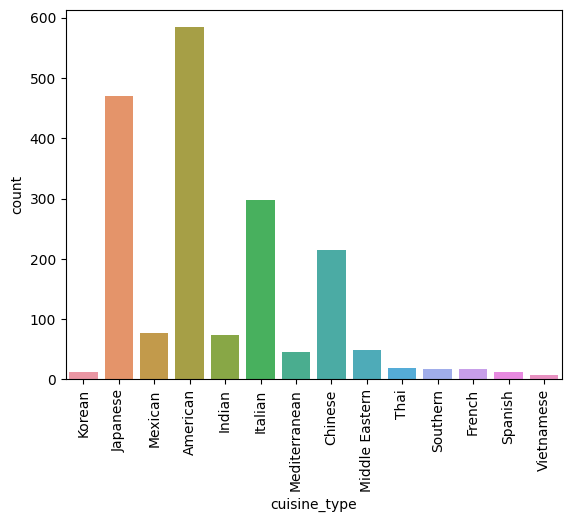

In [130]:
sns.countplot(data =df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

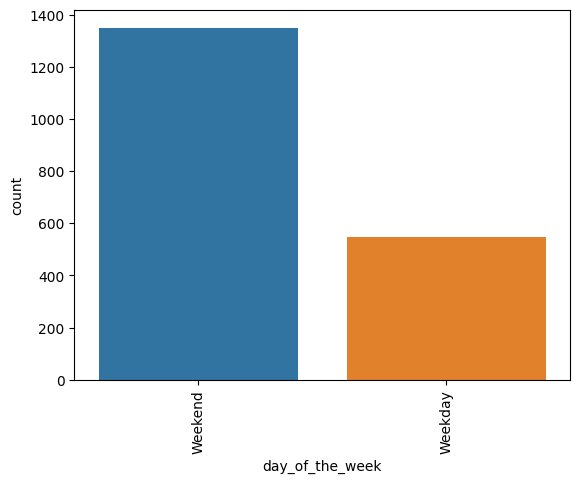

In [131]:
sns.countplot(data =df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()

#### Univariate Analysis - Numerical Data

In [132]:
df.select_dtypes(include=['int64','float64','Int64']).dtypes

order_id                   int64
customer_id                int64
cost_of_the_order        float64
food_preparation_time      int64
delivery_time              int64
dtype: object

<Axes: title={'center': 'Histogram of Delivery Time'}, ylabel='Count'>

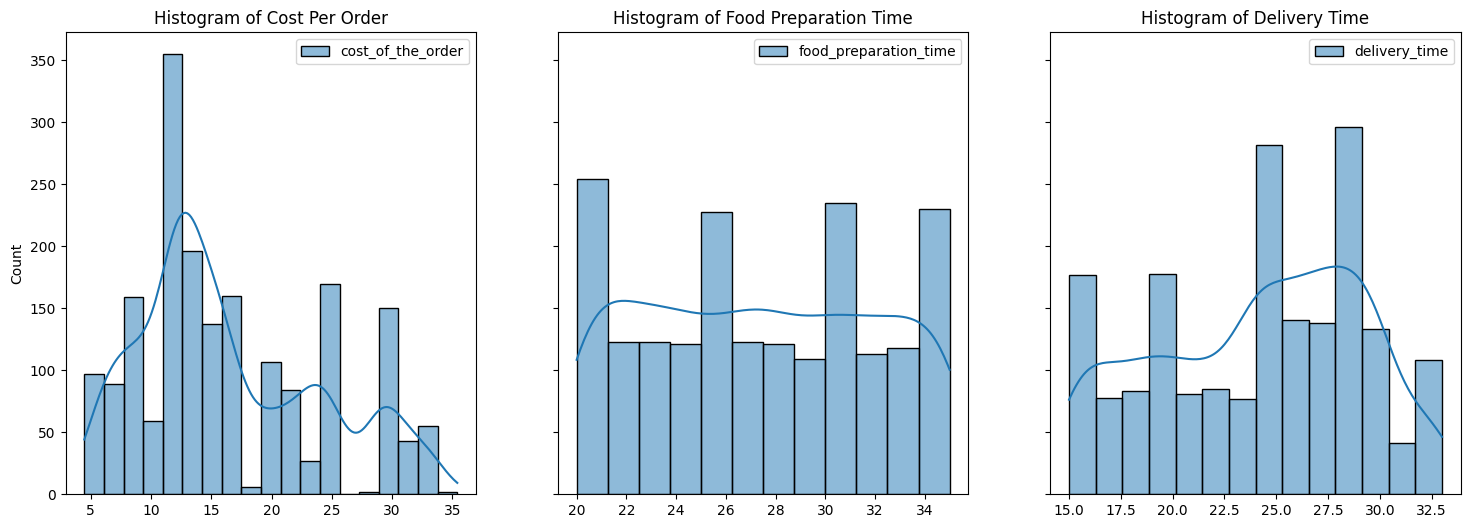

In [133]:
fig, ax = plt.subplots(1,3,figsize=(18, 6), sharey=True)
ax[0].set(title ="Histogram of Cost Per Order")
sns.histplot(df[["cost_of_the_order"]], ax= ax[0], kde=True)

ax[1].set(title ="Histogram of Food Preparation Time")
sns.histplot(df[["food_preparation_time"]], ax=ax[1], kde=True)

ax[2].set(title ="Histogram of Delivery Time")
sns.histplot(df[["delivery_time"]], ax=ax[2], kde=True)

<Axes: title={'center': 'Histogram of Delivery Time'}>

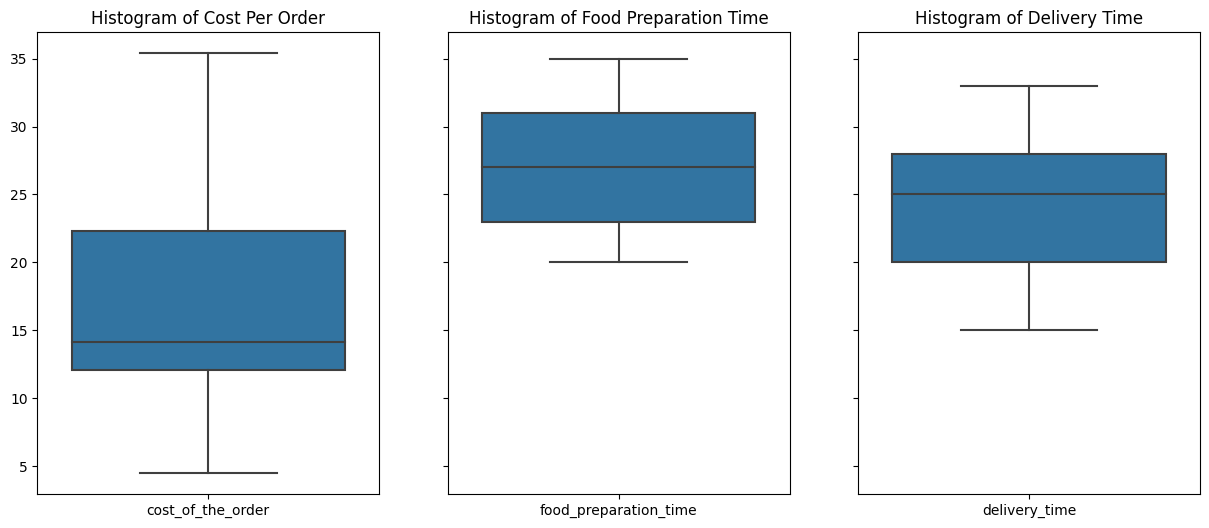

In [134]:
fig, ax = plt.subplots(1,3,figsize=(15, 6), sharey=True)
ax[0].set(title ="Histogram of Cost Per Order")
sns.boxplot(df[["cost_of_the_order"]], ax= ax[0])

ax[1].set(title ="Histogram of Food Preparation Time")
sns.boxplot(df[["food_preparation_time"]], ax=ax[1])

ax[2].set(title ="Histogram of Delivery Time")
sns.boxplot(df[["delivery_time"]], ax=ax[2])

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [135]:
# Write the code here
df['restaurant_name'].value_counts().nlargest(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm are the top 5 restaurants which had most number of orders.


### **Question 8**: Which is the most popular cuisine on weekends?

In [136]:
# Write the code here
df_weekend_only = df[df['day_of_the_week'] == 'Weekend']
df_weekend_only['cuisine_type'].value_counts().nlargest(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:
American cuisine is the most popular on weekends with 415 orders.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [137]:
# Write the code here
df[df['cost_of_the_order'] > 20.0].shape[0]/df['cost_of_the_order'].shape[0] * 100

29.24130663856691

#### Observations: 29.24% of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time?

In [138]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations:
Mean order delivery time is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [139]:
# Write the code here
df['customer_id'].value_counts().nlargest(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
Top 3 most frequent customers are 52832, 47440, 83287. The number of orders they placed are 13,19,9 respectively.

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

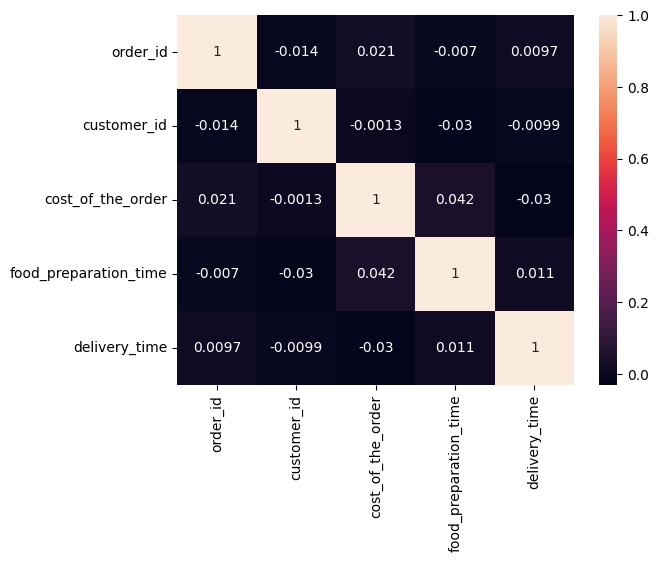

In [140]:
# Write the code here
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

Observations: No special correlations can be seen between numerical variables

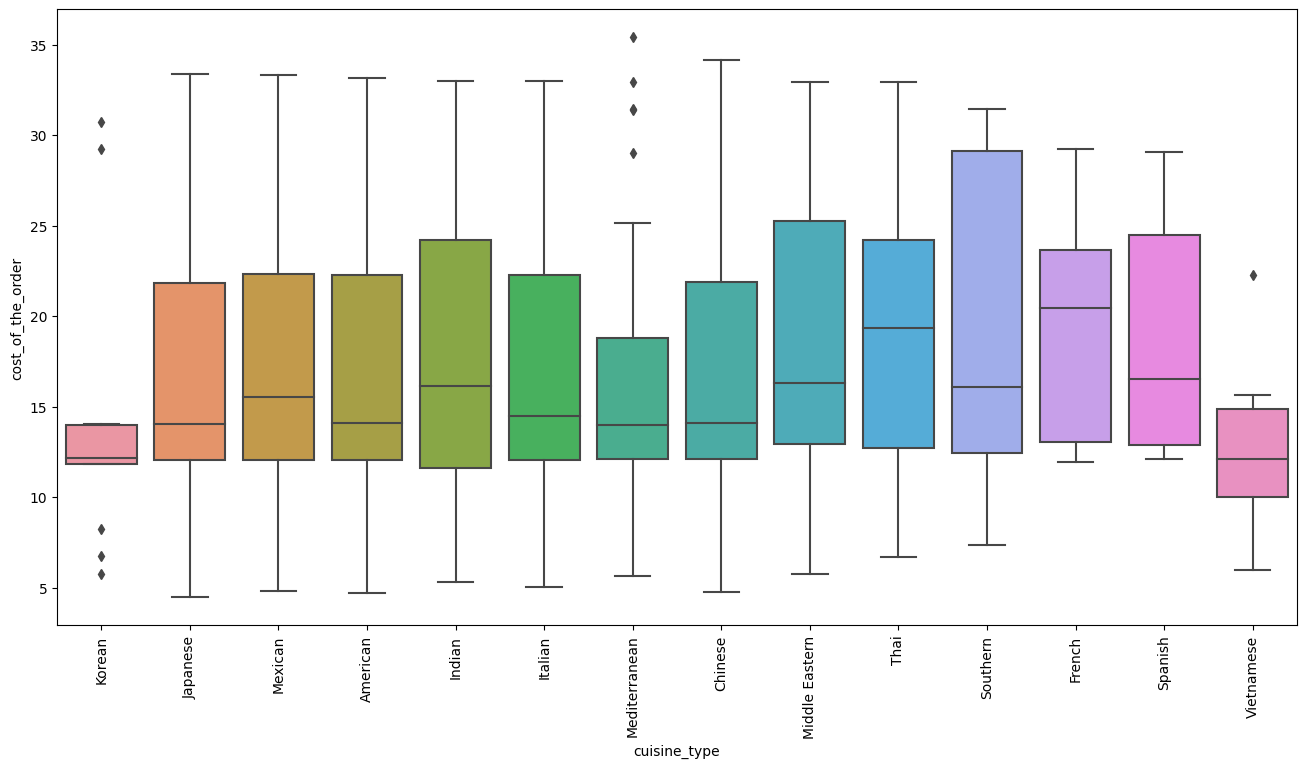

In [141]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(16,8))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df)
plt.xticks(rotation = 90)
plt.show()

Observations: French cuisine has the highest median cost per order. Korean and Mediterrenean cuisines have few orders with abnormal minimums and maximums (outliers)

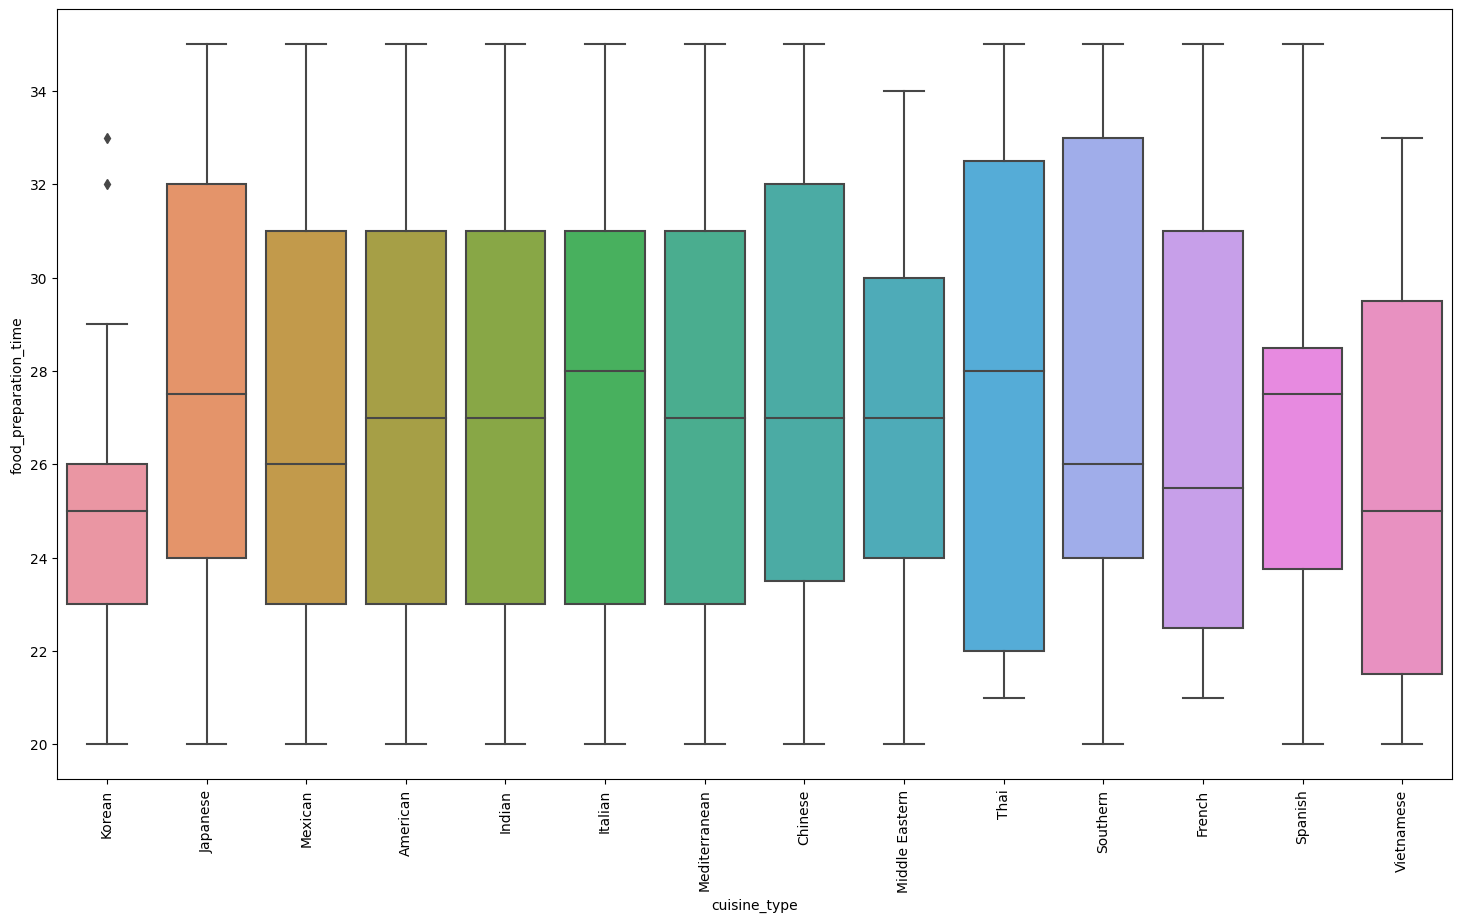

In [142]:
# Relationship between cuisine type and food preparation time
plt.figure(figsize=(18,10))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 90)
plt.show()

Observations: The korean cuisine has the least median food preparation time.

In [143]:
df.groupby('cuisine_type').mean()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
cuisine_type,,,,,
American,1.477489e+06,184169.683219,16.319829,27.440068,24.193493
Chinese,1.477530e+06,180480.855814,16.305209,27.511628,23.855814
French,1.477438e+06,158138.722222,19.793889,26.888889,25.333333
Indian,1.477493e+06,162106.397260,16.919726,27.109589,24.082192
Italian,1.477528e+06,159568.305369,16.418691,27.483221,24.567114
Japanese,1.477485e+06,161493.955319,16.304532,27.510638,24.131915
Korean,1.477426e+06,226702.000000,14.001538,25.461538,20.923077
Mediterranean,1.477483e+06,115908.130435,15.474783,27.000000,23.586957
Mexican,1.477446e+06,181453.545455,16.933117,26.727273,24.389610


In [144]:
# Relationship between day of the week and delivery time
df.groupby('day_of_the_week').mean()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
day_of_the_week,,,,,
Weekday,1.477483e+06,173010.771481,16.311188,27.212066,28.340037
Weekend,1.477500e+06,170422.561066,16.574833,27.436714,22.470022


Observations: There's a significant difference between the delivery times in weekends and weekdays. The orders have been delivered quickly in weekends compared to weekdays. But there's no difference food preparation times in weekends and weekdays.

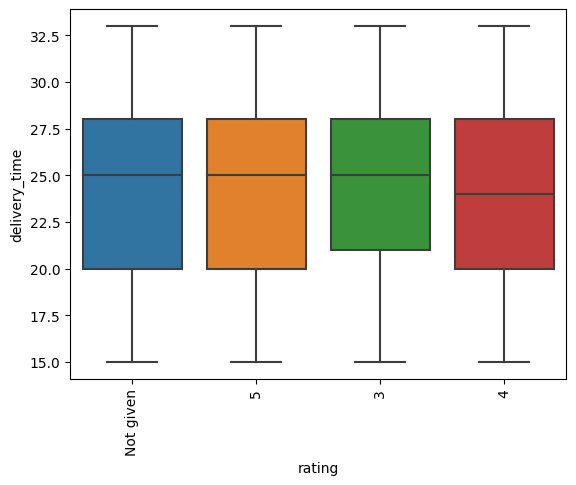

In [145]:
# Relationship between rating and delivery time
plt.figure()
sns.boxplot(x = "rating", y = "delivery_time", data = df)
plt.xticks(rotation = 90)
plt.show()

Observations: There's no much of a difference in the delivery time and the rating given.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [146]:
# Write the code here
df_valid_ratings = df[df['rating']!='Not given'].copy()
df_valid_ratings['rating'] = df_valid_ratings['rating'].astype('int')

# Group the data by restaurant_name
grouped = df_valid_ratings.groupby('restaurant_name')

# Calculate the count of ratings and average rating for each restaurant
restaurant_stats = grouped.agg({'rating': ['count', 'mean']})

# Rename the columns for clarity
restaurant_stats.columns = ['rating_count', 'average_rating']

# Filter restaurants that meet the criteria
promotional_restaurants = restaurant_stats[(restaurant_stats['rating_count'] > 50) & (restaurant_stats['average_rating'] > 4)]

# Reset the index for the resulting DataFrame
promotional_restaurants.reset_index(inplace=True)

promotional_restaurants


,restaurant_name,rating_count,average_rating
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


#### Observations:
Blue Ribbon Fried Chicken	,Blue Ribbon Sushi,Shake Shack,The Meatball Shop are the four restaurants that qualify for the promotion.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [147]:
# Write the code here
def calculate_company_charge(cost_of_the_order):
  """
  A function to calculate the charge based on the cost of each order
  """
  if cost_of_the_order > 20.00:
    charge = cost_of_the_order * 0.25
  elif cost_of_the_order > 5.00:
    charge = cost_of_the_order * 0.15
  else:
    charge = 0

  return charge

df['charge'] = df['cost_of_the_order'].apply(lambda x : calculate_company_charge(x))

df['charge'].sum()

6166.303

#### Observations:
Net revenue generated by the company across all orders is 6166.30 dollars

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [148]:
# Write the code here
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

df[df['total_time'] > 60].shape[0]/df.shape[0] * 100

10.537407797681771

#### Observations: 10.5% of the orders takes more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [149]:
# Write the code here
df[['delivery_time', 'day_of_the_week']].groupby('day_of_the_week').mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
he orders have been delivered quickly in weekends compared to weekdays.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
1. American cuisine is the most popular choice among customers when placing food orders.

2. Customers tend to place more orders on weekends compared to weekdays, indicating a higher demand during the weekend.

3. The mean order cost is approximately \$16.5, with the most common order costs falling in the range of \$13 to \$14.

4. On average, delivery times are longer on weekdays compared to weekends. This longer delivery time on weekdays may be a contributing factor to lower business activity on those days.

5. The majority of customers are highly satisfied, as reflected in their average rating, which is predominantly around the maximum score of 5. However, a significant number of orders remain unrated.

### Recommendations:

1. Given the higher weekend demand, consider running special promotions, discounts, or offers during weekends to encourage more weekday orders.

2. Encourage customers to rate their orders by implementing a review system and offering something like loyalty rewards for those who provide feedback. This can help gather more ratings and feedback to improve the overall service quality.

3. Focus on improving delivery times on weekdays by optimizing routes, increasing delivery staff during peak hours etc